<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Data Visualization**


Estimated time needed: **45** minutes


In this lab, you will focus on data visualization. The dataset will be provided through an RDBMS, and you will need to use SQL queries to extract the required data.


## Objectives


After completing this lab, you will be able to:


-   Visualize the distribution of data.

-   Visualize the relationship between two features.

-   Visualize composition and comparison of data.




## Demo: How to work with database


Download the database file.


In [1]:
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv

--2025-06-28 11:50:22--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
200 OKequest sent, awaiting response... 
Length: 159525875 (152M) [text/csv]
Saving to: ‘survey-data.csv’

survey-data.csv     100%[===================>] 152.13M  80.0MB/s    in 1.9s    

2025-06-28 11:50:26 (80.0 MB/s) - ‘survey-data.csv’ saved [159525875/159525875]



**Install and Import Necessary Python Libraries**

Ensure that you have the required libraries installed to work with SQLite and Pandas:


In [2]:
!pip install pandas 
!pip install matplotlib

import pandas as pd
import matplotlib.pyplot as plt

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 135.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.6/16.6 MB 180.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 134.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 162.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 98.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 155.1 MB/s eta 0:00:00


**Read the CSV File into a Pandas DataFrame**

Load the Stack Overflow survey data into a Pandas DataFrame:


In [3]:
# Read the CSV file
df = pd.read_csv('survey-data.csv')

# Display the first few rows of the data
df.head()


,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


**Create a SQLite Database and Insert the Data**

Now, let's create a new SQLite database (`survey-data.sqlite`) and insert the data from the DataFrame into a table using the sqlite3 library:


In [4]:
import sqlite3

# Create a connection to the SQLite database
conn = sqlite3.connect('survey-data.sqlite')

# Write the dataframe to the SQLite database
df.to_sql('main', conn, if_exists='replace', index=False)


# Close the connection
conn.close()


**Verify the Data in the SQLite Database**
Verify that the data has been correctly inserted into the SQLite database by running a simple query:


In [5]:
# Reconnect to the SQLite database
conn = sqlite3.connect('survey-data.sqlite')

# Run a simple query to check the data
QUERY = "SELECT * FROM main LIMIT 5"
df_check = pd.read_sql_query(QUERY, conn)

# Display the results
print(df_check)


   ResponseId                      MainBranch                 Age  \
0           1  I am a developer by profession  Under 18 years old   
1           2  I am a developer by profession     35-44 years old   
2           3  I am a developer by profession     45-54 years old   
3           4           I am learning to code     18-24 years old   
4           5  I am a developer by profession     18-24 years old   

            Employment RemoteWork   Check  \
0  Employed, full-time     Remote  Apples   
1  Employed, full-time     Remote  Apples   
2  Employed, full-time     Remote  Apples   
3   Student, full-time       None  Apples   
4   Student, full-time       None  Apples   

                                    CodingActivities  \
0                                              Hobby   
1  Hobby;Contribute to open-source projects;Other...   
2  Hobby;Contribute to open-source projects;Other...   
3                                               None   
4                                 

## Demo: Running an SQL Query


Count the number of rows in the table named 'main'


In [6]:
QUERY = """
SELECT COUNT(*) 
FROM main
"""
df = pd.read_sql_query(QUERY, conn)
df.head()


,COUNT(*)
0,65437


## Demo: Listing All Tables


To view the names of all tables in the database:


In [7]:
QUERY = """
SELECT name as Table_Name FROM sqlite_master 
WHERE type = 'table'
"""
pd.read_sql_query(QUERY, conn)


,Table_Name
0,main


## Demo: Running a Group By Query
    
For example, you can group data by a specific column, like Age, to get the count of respondents in each age group:


In [8]:
QUERY = """
SELECT Age, COUNT(*) as count
FROM main
GROUP BY Age
ORDER BY Age
"""
pd.read_sql_query(QUERY, conn)


,Age,count
0,18-24 years old,14098
1,25-34 years old,23911
2,35-44 years old,14942
3,45-54 years old,6249
4,55-64 years old,2575
5,65 years or older,772
6,Prefer not to say,322
7,Under 18 years old,2568


## Demo: Describing a table

Use this query to get the schema of a specific table, main in this case:


In [9]:
table_name = 'main'

QUERY = """
SELECT sql FROM sqlite_master 
WHERE name= '{}'
""".format(table_name)

df = pd.read_sql_query(QUERY, conn)
print(df.iat[0,0])


CREATE TABLE "main" (
"ResponseId" INTEGER,
  "MainBranch" TEXT,
  "Age" TEXT,
  "Employment" TEXT,
  "RemoteWork" TEXT,
  "Check" TEXT,
  "CodingActivities" TEXT,
  "EdLevel" TEXT,
  "LearnCode" TEXT,
  "LearnCodeOnline" TEXT,
  "TechDoc" TEXT,
  "YearsCode" TEXT,
  "YearsCodePro" TEXT,
  "DevType" TEXT,
  "OrgSize" TEXT,
  "PurchaseInfluence" TEXT,
  "BuyNewTool" TEXT,
  "BuildvsBuy" TEXT,
  "TechEndorse" TEXT,
  "Country" TEXT,
  "Currency" TEXT,
  "CompTotal" REAL,
  "LanguageHaveWorkedWith" TEXT,
  "LanguageWantToWorkWith" TEXT,
  "LanguageAdmired" TEXT,
  "DatabaseHaveWorkedWith" TEXT,
  "DatabaseWantToWorkWith" TEXT,
  "DatabaseAdmired" TEXT,
  "PlatformHaveWorkedWith" TEXT,
  "PlatformWantToWorkWith" TEXT,
  "PlatformAdmired" TEXT,
  "WebframeHaveWorkedWith" TEXT,
  "WebframeWantToWorkWith" TEXT,
  "WebframeAdmired" TEXT,
  "EmbeddedHaveWorkedWith" TEXT,
  "EmbeddedWantToWorkWith" TEXT,
  "EmbeddedAdmired" TEXT,
  "MiscTechHaveWorkedWith" TEXT,
  "MiscTechWantToWorkWith" TEXT,


## Hands-on Lab


### Visualizing the Distribution of Data

**Histograms**

Plot a histogram of CompTotal (Total Compensation).


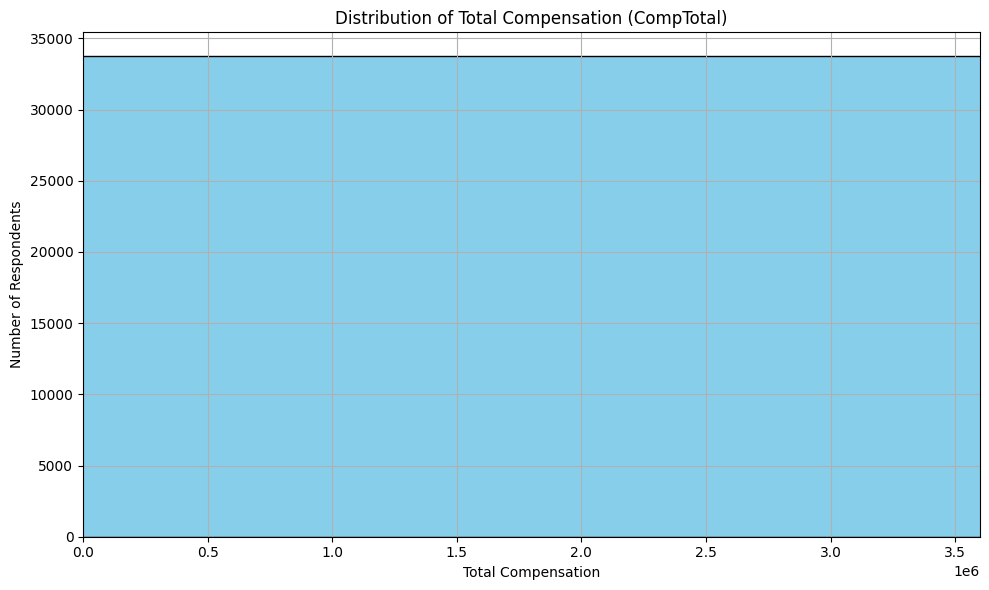

In [10]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Connect to the SQLite database
conn = sqlite3.connect('survey-data.sqlite')

# Step 2: Query non-null CompTotal values
query = """
SELECT CompTotal 
FROM main 
WHERE CompTotal IS NOT NULL
"""
df = pd.read_sql_query(query, conn)

# Step 3: Close the database connection
conn.close()

# Step 4: Plot the histogram
plt.figure(figsize=(10, 6))
plt.hist(df['CompTotal'], bins=100, color='skyblue', edgecolor='black')
plt.title('Distribution of Total Compensation (CompTotal)')
plt.xlabel('Total Compensation')
plt.ylabel('Number of Respondents')
plt.grid(True)
plt.xlim(0, df['CompTotal'].quantile(0.95))  # Optional: Focus on 0–95th percentile to avoid extreme skew
plt.tight_layout()
plt.show()


**Box Plots**

Plot a box plot of Age.


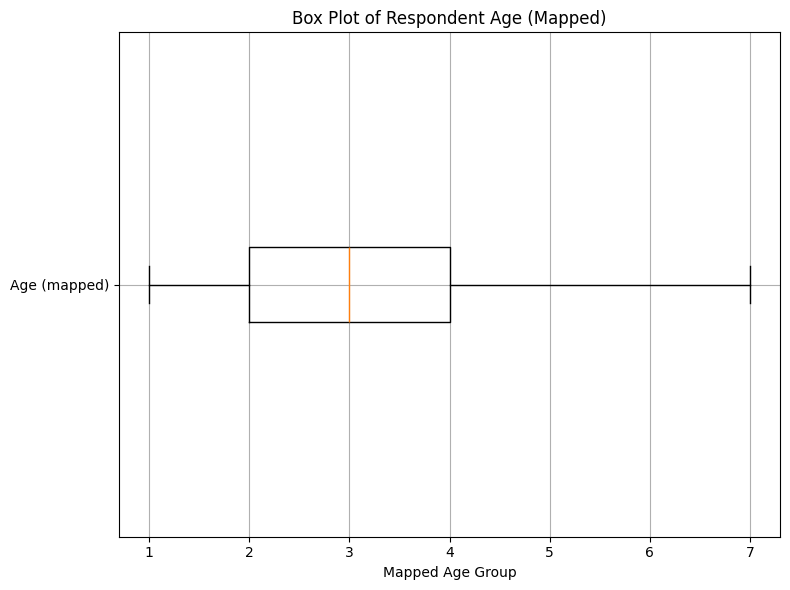

In [11]:
## Write your code here
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Connect to the database
conn = sqlite3.connect('survey-data.sqlite')

# Step 2: Load Age column
query = """
SELECT Age 
FROM main 
WHERE Age IS NOT NULL
"""
df = pd.read_sql_query(query, conn)
conn.close()

# Step 3: Map Age categories to numeric values
age_mapping = {
    'Under 18 years old': 1,
    '18-24 years old': 2,
    '25-34 years old': 3,
    '35-44 years old': 4,
    '45-54 years old': 5,
    '55-64 years old': 6,
    '65 years or older': 7,
    'Prefer not to say': None
}
df['AgeNum'] = df['Age'].map(age_mapping)

# Step 4: Drop missing mapped values
df = df.dropna(subset=['AgeNum'])

# Step 5: Plot box plot
plt.figure(figsize=(8, 6))
plt.boxplot(df['AgeNum'], vert=False)
plt.yticks([1], ['Age (mapped)'])
plt.xlabel("Mapped Age Group")
plt.title("Box Plot of Respondent Age (Mapped)")
plt.grid(True)
plt.tight_layout()
plt.show()


### Visualizing Relationships in Data

**Scatter Plots**

Create a scatter plot of Age and WorkExp.


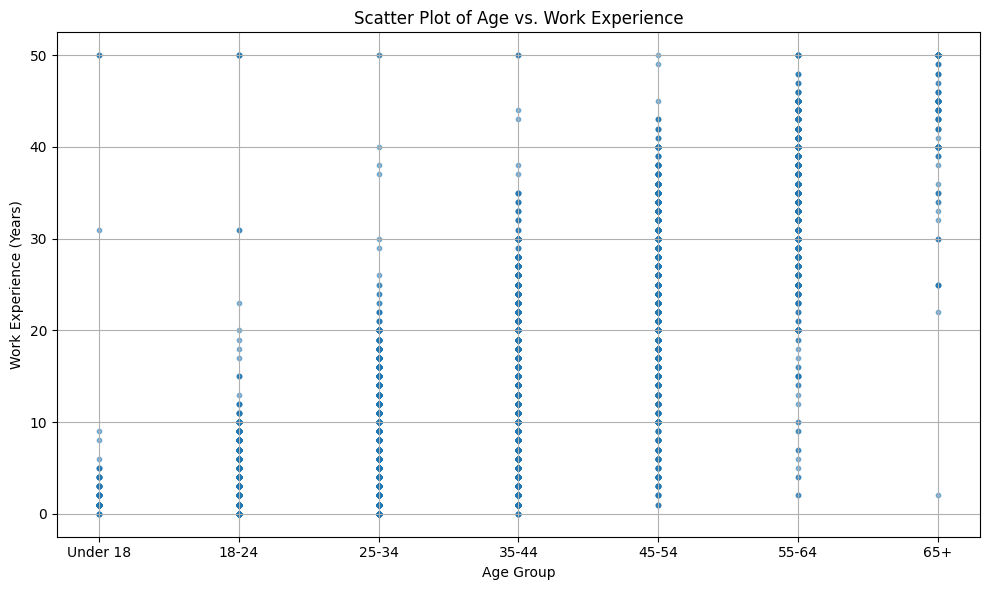

In [12]:
## Write your code here
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Connect to SQLite database
conn = sqlite3.connect('survey-data.sqlite')

# Step 2: Query Age and WorkExp
query = """
SELECT Age, WorkExp 
FROM main 
WHERE Age IS NOT NULL AND WorkExp IS NOT NULL
"""
df = pd.read_sql_query(query, conn)
conn.close()

# Step 3: Map Age to numeric values
age_mapping = {
    'Under 18 years old': 1,
    '18-24 years old': 2,
    '25-34 years old': 3,
    '35-44 years old': 4,
    '45-54 years old': 5,
    '55-64 years old': 6,
    '65 years or older': 7,
    'Prefer not to say': None
}
df['AgeNum'] = df['Age'].map(age_mapping)

# Step 4: Drop rows with missing mapped values
df = df.dropna(subset=['AgeNum'])

# Step 5: Plot scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df['AgeNum'], df['WorkExp'], alpha=0.5, s=10)
plt.xticks(ticks=range(1, 8), labels=[
    'Under 18', '18-24', '25-34', '35-44', '45-54', '55-64', '65+'])
plt.xlabel("Age Group")
plt.ylabel("Work Experience (Years)")
plt.title("Scatter Plot of Age vs. Work Experience")
plt.grid(True)
plt.tight_layout()
plt.show()


**Bubble Plots**

Create a bubble plot of `TimeSearching` and `Frustration` using the Age column as the bubble size.


/tmp/ipykernel_328/2473832198.py:50: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()  # Safe layout


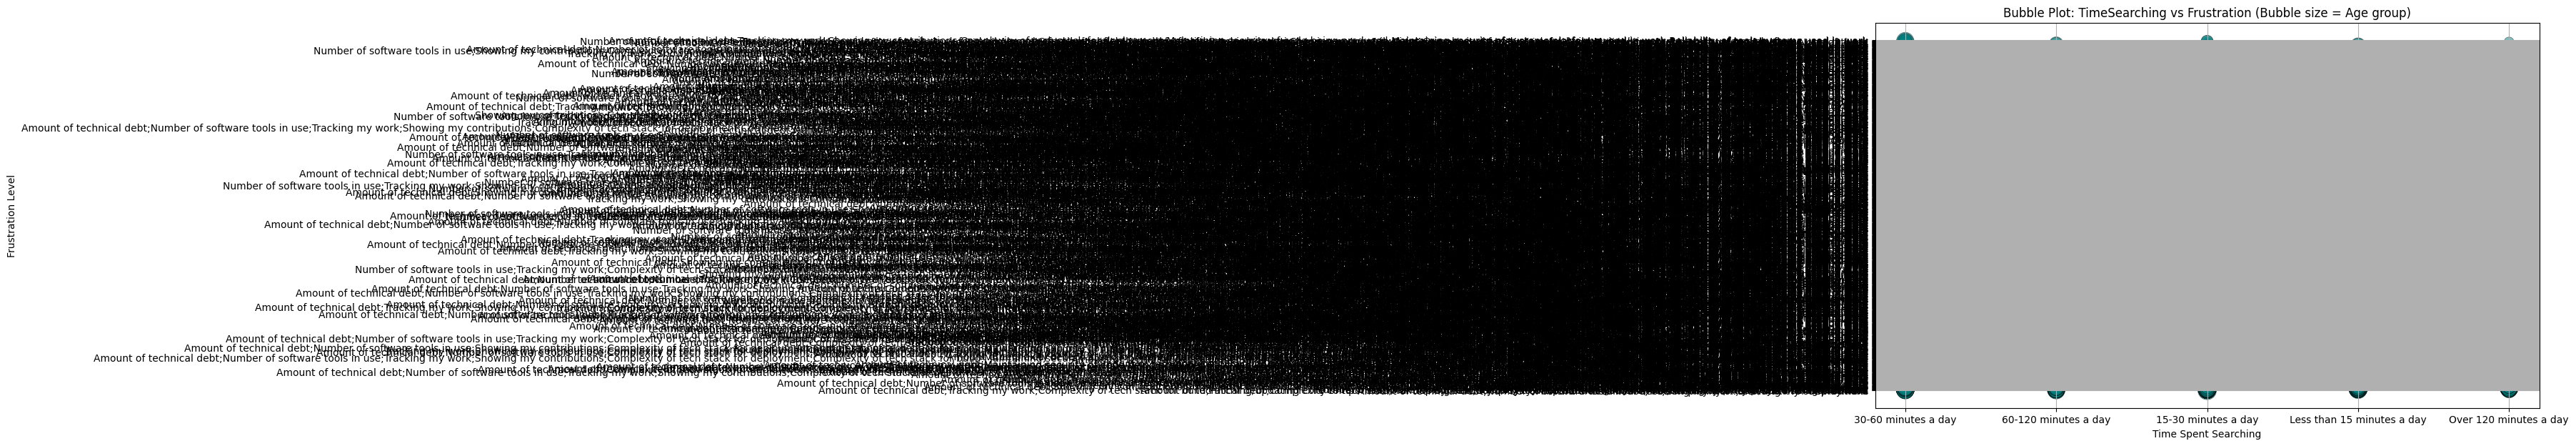

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import sqlite3

# Connect to the SQLite database
conn = sqlite3.connect('survey-data.sqlite')

# Load the relevant data from SQL
query = """
SELECT Age, TimeSearching, Frustration
FROM main
WHERE Age IS NOT NULL AND TimeSearching IS NOT NULL AND Frustration IS NOT NULL
"""
df = pd.read_sql_query(query, conn)

# Map Age to numeric bubble sizes
age_mapping = {
    'Under 18 years old': 10,
    '18-24 years old': 20,
    '25-34 years old': 30,
    '35-44 years old': 40,
    '45-54 years old': 50,
    '55-64 years old': 60,
    '65 years or older': 70
}
df['AgeSize'] = df['Age'].map(age_mapping)

# Drop rows with unmapped Age values
df = df.dropna(subset=['AgeSize', 'TimeSearching', 'Frustration'])

# Reset index
df.reset_index(drop=True, inplace=True)

# Create the bubble plot
plt.figure(figsize=(12, 7))
plt.scatter(
    x=df['TimeSearching'],
    y=df['Frustration'],
    s=df['AgeSize'] * 5,  # Scale bubble sizes
    alpha=0.5,
    color='teal',
    edgecolors='black',
    linewidths=0.5
)

plt.title("Bubble Plot: TimeSearching vs Frustration (Bubble size = Age group)")
plt.xlabel("Time Spent Searching")
plt.ylabel("Frustration Level")
plt.grid(True)
plt.tight_layout()  # Safe layout

plt.show()


### Visualizing Composition of Data

**Pie Charts**

Create a pie chart of the top 5 databases(`DatabaseWantToWorkWith`) that respondents wish to learn next year.


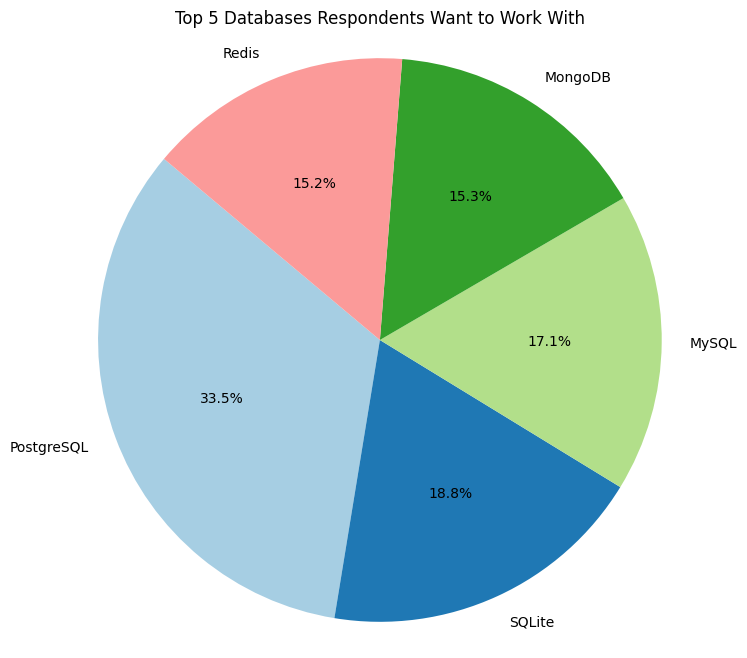

In [16]:
## Write your code here
import pandas as pd
import matplotlib.pyplot as plt
import sqlite3
from collections import Counter

# Step 1: Connect to SQLite database
conn = sqlite3.connect('survey-data.sqlite')

# Step 2: Load relevant column from SQL
query = """
SELECT DatabaseWantToWorkWith 
FROM main 
WHERE DatabaseWantToWorkWith IS NOT NULL
"""
df = pd.read_sql_query(query, conn)

# Step 3: Extract and count each database (semicolon-separated)
def count_databases(column):
    all_dbs = []
    for entry in column.dropna():
        all_dbs.extend(entry.split(';'))
    return Counter(all_dbs)

db_counts = count_databases(df['DatabaseWantToWorkWith'])

# Step 4: Get top 5 databases
top_5 = db_counts.most_common(5)
labels, sizes = zip(*top_5)

# Step 5: Plot pie chart
plt.figure(figsize=(8, 8))
plt.pie(
    sizes,
    labels=labels,
    autopct='%1.1f%%',
    startangle=140,
    colors=plt.cm.Paired.colors
)
plt.title('Top 5 Databases Respondents Want to Work With')
plt.axis('equal')  # Equal aspect ratio for a perfect circle
plt.show()


**Stacked Charts** 

Create a stacked bar chart of median `TimeSearching` and `TimeAnswering` for the age group 30 to 35.


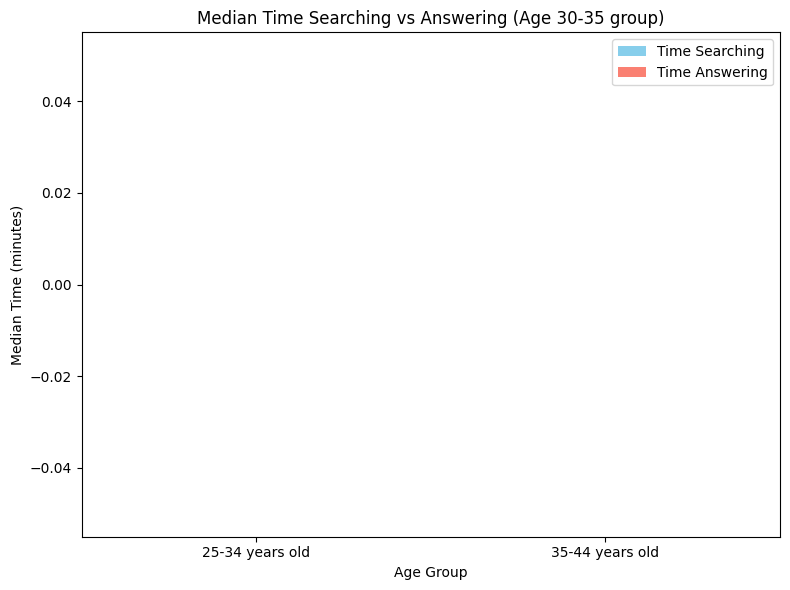

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import sqlite3

# Connect to the database
conn = sqlite3.connect("survey-data.sqlite")

# Load data
df = pd.read_sql_query("SELECT Age, TimeSearching, TimeAnswering FROM main", conn)

# Close connection after reading data
conn.close()

# Filter and copy data safely
df_filtered = df[df['Age'].isin(['25-34 years old', '35-44 years old'])].copy()

# Map time ranges to numeric values (minutes)
time_mapping = {
    'Less than 30 minutes': 15,
    '30-59 minutes': 45,
    '30–59 minutes': 45,
    '1-2 hours': 90,
    '1–2 hours': 90,
    '2-3 hours': 150,
    '2–3 hours': 150,
    'More than 3 hours': 210,
    'More than 3 hrs': 210,
    'More than 3 Hours': 210
}

# Apply the mapping
df_filtered['TimeSearchingNum'] = df_filtered['TimeSearching'].map(time_mapping)
df_filtered['TimeAnsweringNum'] = df_filtered['TimeAnswering'].map(time_mapping)

# Group by Age and calculate median
median_times = df_filtered.groupby('Age')[['TimeSearchingNum', 'TimeAnsweringNum']].median()

# Plot
median_times.plot(kind='bar', stacked=True, figsize=(8, 6), color=['skyblue', 'salmon'])
plt.title("Median Time Searching vs Answering (Age 30-35 group)")
plt.ylabel("Median Time (minutes)")
plt.xlabel("Age Group")
plt.xticks(rotation=0)
plt.legend(["Time Searching", "Time Answering"])
plt.tight_layout()
plt.show()


### Visualizing Comparison of Data

**Line Chart**

Plot the median `CompTotal` for all ages from 45 to 60.


In [ ]:
## Write your code here

**Bar Chart**

Create a horizontal bar chart using the `MainBranch` column.


In [ ]:
## Write your code here

### Summary


In this lab, you focused on extracting and visualizing data from an RDBMS using SQL queries and SQLite. You applied various visualization techniques, including:

- Histograms to display the distribution of CompTotal.
- Box plots to show the spread of ages.
- Scatter plots and bubble plots to explore relationships between variables like Age, WorkExp, `TimeSearching` and `TimeAnswering`.
- Pie charts and stacked charts to visualize the composition of data.
- Line charts and bar charts to compare data across categories.


### Close the Database Connection

Once the lab is complete, ensure to close the database connection:


In [ ]:
conn.close()

## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


Copyright © IBM Corporation. All rights reserved.
